In [1]:
include("..//src//SolveDG1D.jl");
import .SolveDG1D as sd;

In [2]:
x_begin::Float64 = -10.;
x_end::Float64 = 10.;
n_node::Int64 = 51;
mesh1D::Vector{Float64} = sd.generateMesh(x_begin, x_end, n_node);
n_gauss::Int64 = 3;
n_step::Int64 = 1000;
dt::Float64 = 0.004;
fuFunction(u::Float64)::Float64 = u^2/2.;
# initialFunction(x::Float64)::Float64 = x<0 ? 0. :  1.;
function initialFunction(x::Float64)::Float64
    if x<-5
        return x+10;
    elseif x>5
        return x-10;
    else
        return -x;
    end
end
lhsBcFunction(t::Float64)::Float64 = 0.;
rhsBcFunction(t::Float64)::Float64 = 0.;
interpolation_devide::Int64 = 4;

In [3]:
case::sd.Case = sd.generateCase(
    mesh1D,
    n_gauss,
    n_step,
    dt,
    fuFunction,
    initialFunction,
    lhsBcFunction,
    rhsBcFunction,
    interpolation_devide
);

In [4]:
@time res::Tuple = sd.solveCase(case);

  0.241042 seconds (1.78 M allocations: 134.175 MiB, 56.59% gc time, 33.16% compilation time)


In [5]:
using Plots

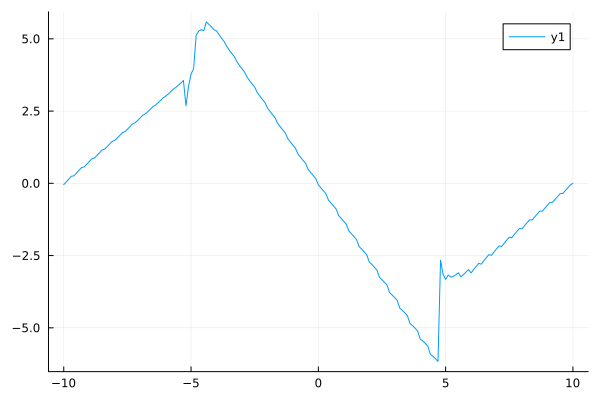

In [15]:
plot(
    res[1],
    res[2][3, :]
)

In [7]:
reshape(sd.initialCoeff(case), (n_gauss, n_node-1))

3×50 Matrix{Float64}:
 0.2          0.6          1.0          …  -0.6          -0.2
 0.2          0.2          0.2              0.2           0.2
 3.08395e-17  3.08395e-17  3.08395e-17      3.08395e-17   3.08395e-17